In [1]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After mounting Google Drive
%cd /content/drive/MyDrive/BU Summer 22/CSE422/ML proj/

/content/drive/MyDrive/BU Summer 22/CSE422/ML proj


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Dataset

In [4]:
df = pd.read_csv('mail_data.csv')

In [5]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Data preprocessing**

In [6]:
# Dropping the null values from the dataset
df = df.dropna()

In [7]:
# Dataframe after dropping null values
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Total number of rows the dataframe has
df.shape

(5572, 2)

In [9]:
# Total number of mails each category has
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
# Removing the duplicate mails from the dataset
df = df.drop_duplicates()

In [11]:
# Dataframe after dropping duplicate mails 
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Total number of mails the dataframe has after removing duplicate values
df.shape

(5157, 2)

In [13]:
# Total number of mails each category has after removing the duplicate mails from the dataset
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

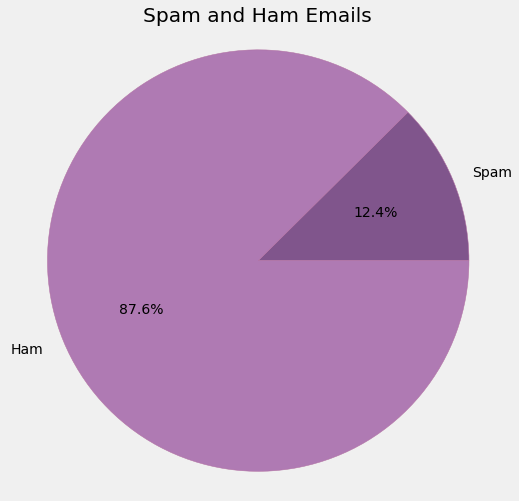

In [14]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

plt.title("Spam and Ham Emails")

spam_val = df[df['Category'] == 'spam'].shape[0] # Selecting the 0th elem of the tuple (641, 2)
ham_val = df[df['Category'] == 'ham'].shape[0]  # Selecting the 0th elem of the tuple (4516, 2)  

spam_perc = spam_val / (spam_val + ham_val) * 100
ham_perc = ham_val / (spam_val + ham_val) * 100

slices = [spam_perc, ham_perc]
labels = ["Spam", "Ham"]
colors = ['#80558C', '#AF7AB3']

plt.pie(slices, labels=labels, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': '#B270A2'})
plt.axis('equal')

size = plt.gcf()
size.set_size_inches(8, 8) 

plt.show()

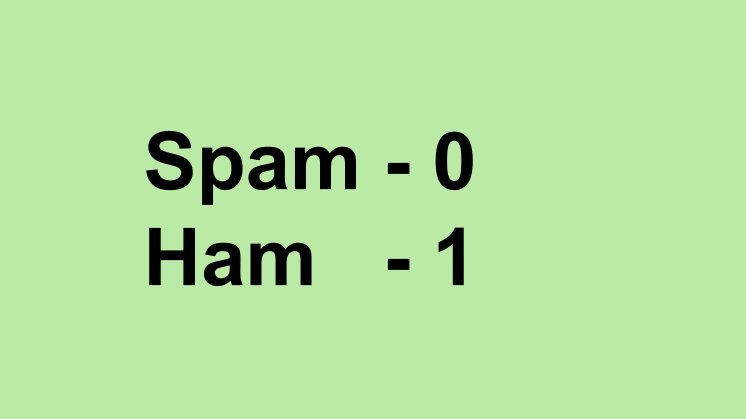



**Label encoding**

In [15]:
# Label spam mail as 0 and ham mail as 1

df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [16]:
# Dataframe after Label Encoding
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


**Separate x and y**

In [17]:
# Separating the dataset into x and y 

x = df['Message']
y = df['Category']

**Splitting the dataset into train and test data**

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

In [19]:
# Printing the shape of x, xtrain and xtest

print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(5157,)
(4125,)
(1032,)


**Feature Extraction**

In [20]:
# Converting xtrain and xtest into feature vectors i.e. int type so that ML models can work with them
cv = CountVectorizer()

x_train = cv.fit_transform(xtrain)
x_test = cv.transform(xtest)

In [21]:
# Printing vocabularies with their respective indices
print('Vocabulary:', cv.vocabulary_)

Vocabulary: {'dun': 2461, 'believe': 1287, 'thk': 6819, 'told': 6913, 'him': 3405, 'and': 950, 'do': 2343, 'you': 7651, 'have': 3332, 'any': 982, 'one': 4914, 'that': 6774, 'can': 1603, 'teach': 6694, 'me': 4385, 'how': 3490, 'to': 6898, 'ship': 6045, 'cars': 1644, 'send': 5969, 'logo': 4164, 'ur': 7157, 'lover': 4215, 'names': 4665, 'joined': 3817, 'by': 1564, 'heart': 3354, 'txt': 7055, 'love': 4210, 'name1': 4662, 'name2': 4663, 'mobno': 4527, 'eg': 2520, 'adam': 800, 'eve': 2636, '07123456789': 25, '87077': 682, 'yahoo': 7614, 'pobox36504w45wq': 5239, 'txtno': 7062, 'no': 4773, 'ads': 822, '150p': 300, 'sir': 6138, 'need': 4703, 'velusamy': 7222, 'date': 2149, 'of': 4869, 'birth': 1337, 'company': 1892, 'bank': 1197, 'facilities': 2723, 'details': 2243, 'emailed': 2549, 'yifeng': 7643, 'my': 4641, 'part': 5062, 'oredi': 4959, 'get': 3094, 'it': 3733, 'fr': 2944, 'thank': 6765, 'meet': 4403, 'monday': 4546, 'well': 7405, 'gonna': 3158, 'finish': 2836, 'bath': 1225, 'now': 4821, 'goo

In [22]:
# Printing the xtrain before it was converted to feature vector
print(xtrain)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


In [23]:
# Printing x_train as an array after converting it to feature vector
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
# Converting ytrain and ytest into int type as they are of object type currently and ML models will be working with int type 

y_train = ytrain.astype('int')
y_test = ytest.astype('int')

In [25]:
# Printing ytrain before it was converted to int type
print(ytrain)

1786    1
3576    1
420     0
5156    1
3354    1
       ..
809     1
993     1
1726    1
3525    1
1748    1
Name: Category, Length: 4125, dtype: object


In [26]:
# Printing y_train after converting it to int type from object type 
y_train

1786    1
3576    1
420     0
5156    1
3354    1
       ..
809     1
993     1
1726    1
3525    1
1748    1
Name: Category, Length: 4125, dtype: int64

## Naive Bayes

**Training the model**

In [27]:
# Importing Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB

In [28]:
# Fitting the train data into the model

model1 = MultinomialNB()
model1.fit(x_train, y_train)

MultinomialNB()

**Testing the model**

In [29]:
# Predicting the test data
model1.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
# A list of new input mails to test the model
new_mails = [
            "Hey, what's your plan for tomorrow?",
            "You've won a free ticket to FIFA World Cup Qatar 2022", 
            "CSE422 Assignment Deadline Extension Request"
]

# Converting new_mails to feature vectors
vectorized_new_mails = cv.transform(new_mails)

# Predicting the new mails
res_arr = model1.predict(vectorized_new_mails)

# Printing the result we got after predicting
for mail in res_arr:
    if mail == 0:
        print("Spam Email")
    else:
        print("Ham Email")

Ham Email
Spam Email
Ham Email


## Logistic Regression

**Training the model**

In [31]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [32]:
# Fitting the train data into the model

model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

**Testing the model**

In [33]:
# Predicting the test data
model2.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
# A list of new input mails to test the model
new_mails = [
            "Hey, what's your plan for tomorrow?",
            "You've won a free ticket to FIFA World Cup Qatar 2022", 
            "CSE422 Assignment Deadline Extension Request"
]

# Converting new_mails to feature vectors
vectorized_new_mails = cv.transform(new_mails)

# Predicting the new mails
res_arr = model1.predict(vectorized_new_mails)

# Printing the result we got after predicting
for mail in res_arr:
    if mail == 0:
        print("Spam Email")
    else:
        print("Ham Email")

Ham Email
Spam Email
Ham Email


## SVM

**Training the model**

In [35]:
# importing SVM
from sklearn.svm import SVC

In [36]:
# Fitting the train data into the model

model3 = SVC()
model3.fit(x_train, y_train)

SVC()

**Testing the model**

In [37]:
# Predicting the test data
model3.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# A list of new input mails to test the model
new_mails = [
            "Hey, what's your plan for tomorrow?",
            "You've won a free ticket to FIFA World Cup Qatar 2022", 
            "CSE422 Assignment Deadline Extension Request"
]

# Converting new_mails to feature vectors
vectorized_new_mails = cv.transform(new_mails)

# Predicting the new mails
res_arr = model1.predict(vectorized_new_mails)

# Printing the result we got after predicting
for mail in res_arr:
    if mail == 0:
        print("Spam Email")
    else:
        print("Ham Email")

Ham Email
Spam Email
Ham Email


## Comparison

**Naive Bayes**

In [39]:
# Predicting y_test for x_test

prediction_NB = model1.predict(x_test)
accuracy_NB = accuracy_score(y_test, prediction_NB)
print("The accuracy of the Naive Bayes Model is:", round(accuracy_NB * 100, 2), "%")

The accuracy of the Naive Bayes Model is: 97.87 %


In [40]:
# Confusion Matrix For Naive Bayes

cf_matrix1 = confusion_matrix(y_test, prediction_NB)
print(cf_matrix1)

[[120  19]
 [  3 890]]


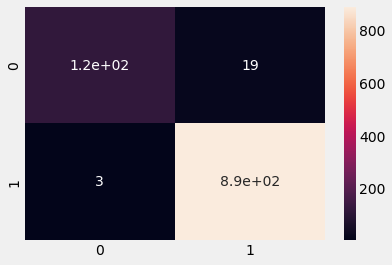

In [41]:
# Confusion Matrix as a Heatmap
plot = sns.heatmap(cf_matrix1, annot=True)

**Logistic Regression**

In [42]:
# Predicting y_test for x_test

prediction_LR = model2.predict(x_test)
accuracy_LR = accuracy_score(y_test, prediction_LR)
print("The accuracy of the Logistic Regression Model is:", round(accuracy_LR * 100, 2), "%")

The accuracy of the Logistic Regression Model is: 97.67 %


In [43]:
# Confusion Matrix For Logistic Regression


cf_matrix2 = confusion_matrix(y_test, prediction_LR)
print(cf_matrix2)

[[116  23]
 [  1 892]]


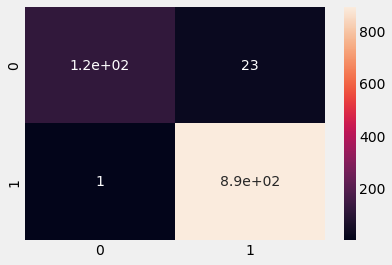

In [44]:
# Confusion Matrix as a Heatmap
plot = sns.heatmap(cf_matrix2, annot=True)

**Support Vector Machine**

In [45]:
# Predicting y_test for x_test

prediction_SVM = model3.predict(x_test)
accuracy_SVM = accuracy_score(y_test, prediction_SVM)
print("The accuracy of the Support Vector Machine model is:", round(accuracy_SVM * 100, 2), "%")

The accuracy of the Support Vector Machine model is: 97.48 %


In [46]:
# Confusion Matrix For Support Vector Machine

cf_matrix3 = confusion_matrix(y_test, prediction_SVM)
print(cf_matrix3)

[[113  26]
 [  0 893]]


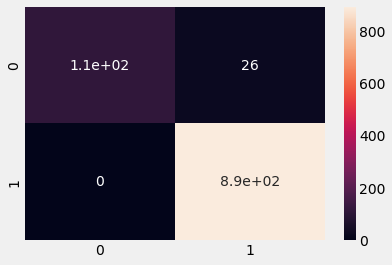

In [47]:
# Confusion Matrix as a Heatmap
plot = sns.heatmap(cf_matrix3, annot=True)